# 20152410 배형준 머신러닝 과제4

In [1]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 1. Plot the estimated parameters using the training dataset

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

In [3]:
# load trainset and testset

train_directory = './과제4/data_train.csv'
test_directory = './과제4/data_test.csv'

train = pd.read_csv(train_directory, header=None)
test = pd.read_csv(test_directory, header=None)

column_name = ['x', 'y', 'z', 'h']
train.columns = column_name
test.columns = column_name

X_train = train.iloc[:, 0:3]
X_test = test.iloc[:, 0:3]
Y_train = train.iloc[:, 3]
Y_test = test.iloc[:, 3]

In [4]:
train.head()

,x,y,z,h
0,0.273548,-8.932102,18.708684,73.578825
1,5.403327,4.782977,-18.762210,-56.410433
2,0.029941,-3.245916,6.932498,52.390768
3,3.047974,0.715211,-1.965419,-6.936295
4,1.302074,-5.871807,-15.702181,-34.997017


In [5]:
test.head()

,x,y,z,h
0,-1.788894,-2.717927,-4.425695,-14.055818
1,2.958174,4.515505,6.644435,20.504905
2,-0.569490,10.096246,-13.270292,-73.843148
3,4.279318,2.747878,-5.857125,-24.644937
4,0.125975,-4.349421,5.777460,31.934657


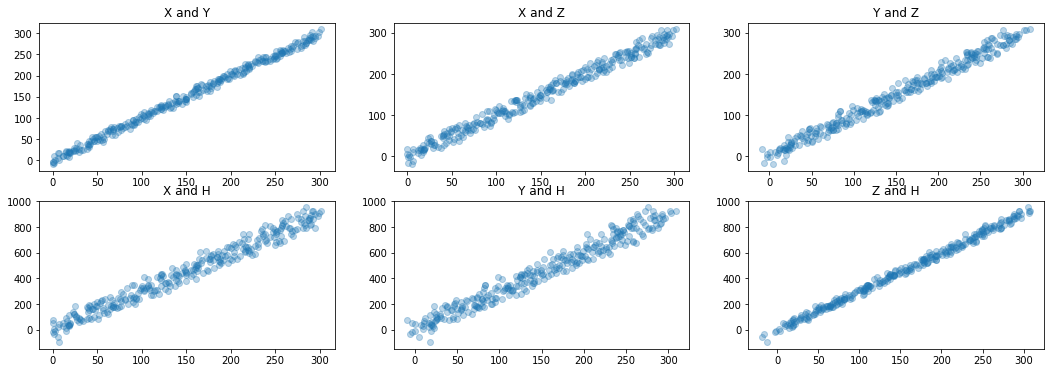

In [6]:
# 변수들이 어떤 상관관계를 가지고 있는지 체크

plt.figure(figsize=(18, 6))
plt.subplot(231)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.3)
plt.title('X and Y')
plt.subplot(232)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], alpha=0.3)
plt.title('X and Z')
plt.subplot(233)
plt.scatter(X_train.iloc[:, 1], X_train.iloc[:, 2], alpha=0.3)
plt.title('Y and Z')
plt.subplot(234)
plt.scatter(X_train.iloc[:, 0], Y_train, alpha=0.3)
plt.title('X and H')
plt.subplot(235)
plt.scatter(X_train.iloc[:, 1], Y_train, alpha=0.3)
plt.title('Y and H')
plt.subplot(236)
plt.scatter(X_train.iloc[:, 2], Y_train, alpha=0.3)
plt.title('Z and H')
plt.show()

feature간의 다중공선성이 강한 것으로 보아 선형회귀를 학습할 때 계수 추정이 제대로 이뤄지지 않을 것을 예상할 수 있다.

다른 말로 표현하자면 normal equation으로 선형회귀의 계수 추정을 할 때 $X^T*X$가 non-invertible하거나 invertible이지만 rank가 모자란 상황이라고 볼 수 있다.

밑에 있는 make_regression 함수를 여러 번 돌려본 결과 수렴할 때가 있고 수렴하지 않을 때가 있는데 이것은 theta의 초기값의 랜덤성때문이라고 생각한다. 따라서 setseed (random_state)를 지정하여 여러 번 돌려본 후 학습 알고리즘이 수렴하는지, 수렴한다면 theta 값은 어떻게 되는지 결과를 비교하도록 하겠다.

In [7]:
def make_regression(X_train, Y_train, X_test, Y_test, seed):
    
    # set random initial condition of parameters
    
    m = len(Y_train)
    n = len(Y_test)
    X_train = np.hstack((np.ones((m, 1)), np.array(X_train)))
    X_test = np.hstack((np.ones((n, 1)), np.array(X_test)))
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)
    
    np.random.seed(seed)
    initial_theta = np.random.randn(4, 1)
    record_theta = initial_theta.T
    
    initial_train_loss = (Y_train - X_train.dot(initial_theta)).T.dot(Y_train - X_train.dot(initial_theta)) / (2*m)
    initial_test_loss = (Y_test - X_test.dot(initial_theta)).T.dot(Y_test - X_test.dot(initial_theta)) / (2*n)
    
    list_train_loss = [float(initial_train_loss)]
    list_test_loss = [float(initial_test_loss)]

    temp_theta = initial_theta
    temp_train_loss = initial_train_loss
    
    learning_rate = 10**(-8)
    error_bound = 10**(-3)

    # model learning

    while True:
        # calculate gradient
        gradient_theta = (X_train.T.dot(X_train).dot(temp_theta) - X_train.T.dot(Y_train)) / m
    
        # renew the parameters
        next_theta = temp_theta - learning_rate * gradient_theta
        temp_theta = next_theta
    
        # calculate loss to evaluate the parameters
        next_train_loss = (Y_train - X_train.dot(next_theta)).T.dot(Y_train - X_train.dot(next_theta)) / (2*m)
        test_loss = (Y_test - X_test.dot(next_theta)).T.dot(Y_test - X_test.dot(next_theta)) / (2*n)
    
        # store results
        record_theta = np.vstack((record_theta, temp_theta.T))
        list_train_loss.append(float(next_train_loss))
        list_test_loss.append(float(test_loss))
        
        # stopping rule
        if len(list_train_loss) > 5000:
            if temp_train_loss > next_train_loss and temp_train_loss - next_train_loss < error_bound:
                break
            if list_train_loss[-1] > list_train_loss[-10]:
                break # 초기값이나 학습률의 문제로 loss가 발산했을 때 학습을 멈추고 함수를 고치기 위한 용도
            if len(list_train_loss) < 10000:
                break # 초기값이나 학습률의 문제로 loss가 발산했을 때 학습을 멈추고 함수를 고치기 위한 용도
                
        temp_train_loss = next_train_loss
    
    result_theta = record_theta[-1, :]
    
    return result_theta, record_theta, list_train_loss, list_test_loss

학습 알고리즘의 정지 조건은 5000번 이상 실행한 후 i+1번째의 loss가 i번째의 loss보다 error_bound 이하로 감소하면 학습을 종료한다.

10000번 넘어서도 학습이 완료되지 않으면 초기값 문제로 알고리즘이 수렴하지 않을 수 있고 그 이유로는 X_train 변수 간 다중 공선성이 강해서라고 생각합니다. (어떤 경우엔 잘 학습되지만 어떤 경우엔 알고리즘이 수렴하지 않아 계속 실행됨)

## make regression with random_state = 568

In [8]:
result_theta_568, record_theta_568, list_train_loss_568, list_test_loss_568 = make_regression(X_train, Y_train, X_test, Y_test, 568)

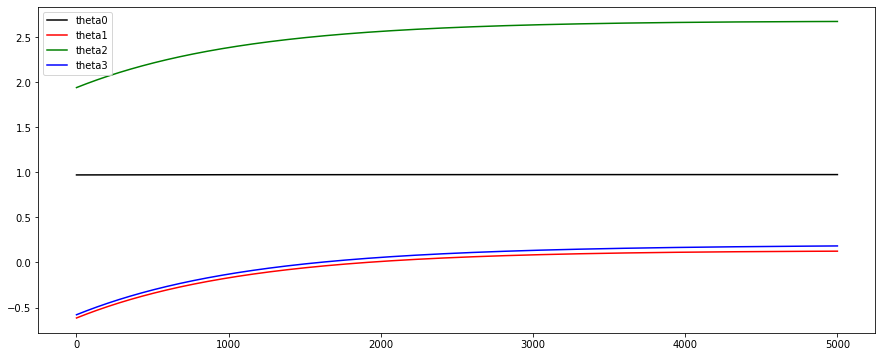

In [9]:
# plot of theta0 ~ theta3

plt.figure(figsize=(15, 6))
plt.plot(record_theta_568[:, 0], 'k', label='theta0')
plt.plot(record_theta_568[:, 1], 'r', label='theta1')
plt.plot(record_theta_568[:, 2], 'g', label='theta2')
plt.plot(record_theta_568[:, 3], 'b', label='theta3')
plt.legend(loc='best')
plt.show()

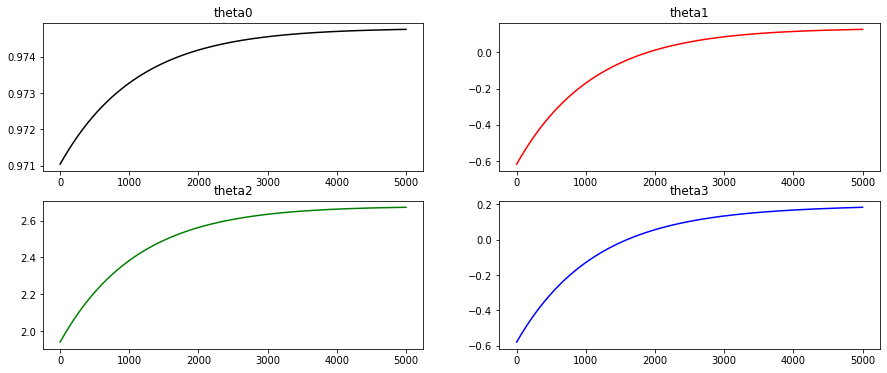

In [10]:
# 그래프가 겹치는 것을 고려하여 각각 출력

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(record_theta_568[:, 0], 'k', label='theta0')
plt.title('theta0')
plt.subplot(222)
plt.plot(record_theta_568[:, 1], 'r', label='theta1')
plt.title('theta1')
plt.subplot(223)
plt.plot(record_theta_568[:, 2], 'g', label='theta2')
plt.title('theta2')
plt.subplot(224)
plt.plot(record_theta_568[:, 3], 'b', label='theta3')
plt.title('theta3')
plt.show()

## make regression with random_state = 4489

In [11]:
result_theta_4489, record_theta_4489, list_train_loss_4489, list_test_loss_4489 = make_regression(X_train, Y_train, X_test, Y_test, 4489)

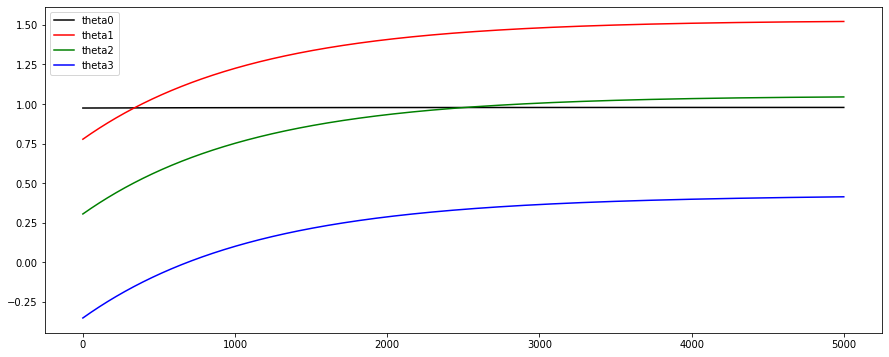

In [12]:
# plot of theta0 ~ theta3

plt.figure(figsize=(15, 6))
plt.plot(record_theta_4489[:, 0], 'k', label='theta0')
plt.plot(record_theta_4489[:, 1], 'r', label='theta1')
plt.plot(record_theta_4489[:, 2], 'g', label='theta2')
plt.plot(record_theta_4489[:, 3], 'b', label='theta3')
plt.legend(loc='best')
plt.show()

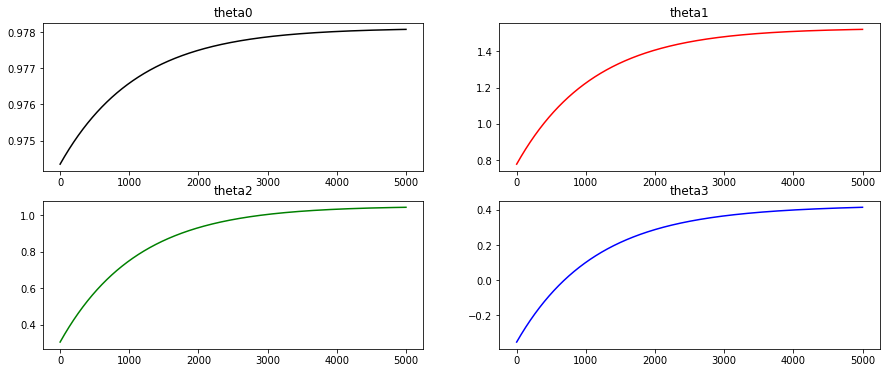

In [13]:
# 그래프가 겹치는 것을 고려하여 각각 출력

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(record_theta_4489[:, 0], 'k', label='theta0')
plt.title('theta0')
plt.subplot(222)
plt.plot(record_theta_4489[:, 1], 'r', label='theta1')
plt.title('theta1')
plt.subplot(223)
plt.plot(record_theta_4489[:, 2], 'g', label='theta2')
plt.title('theta2')
plt.subplot(224)
plt.plot(record_theta_4489[:, 3], 'b', label='theta3')
plt.title('theta3')
plt.show()

## make regression with random_state = 241

In [14]:
result_theta_241, record_theta_241, list_train_loss_241, list_test_loss_241 = make_regression(X_train, Y_train, X_test, Y_test, 241)

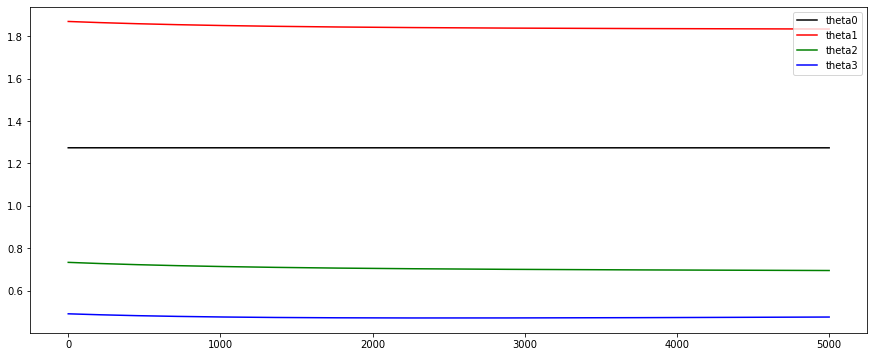

In [15]:
# plot of theta0 ~ theta3

plt.figure(figsize=(15, 6))
plt.plot(record_theta_241[:, 0], 'k', label='theta0')
plt.plot(record_theta_241[:, 1], 'r', label='theta1')
plt.plot(record_theta_241[:, 2], 'g', label='theta2')
plt.plot(record_theta_241[:, 3], 'b', label='theta3')
plt.legend(loc='best')
plt.show()

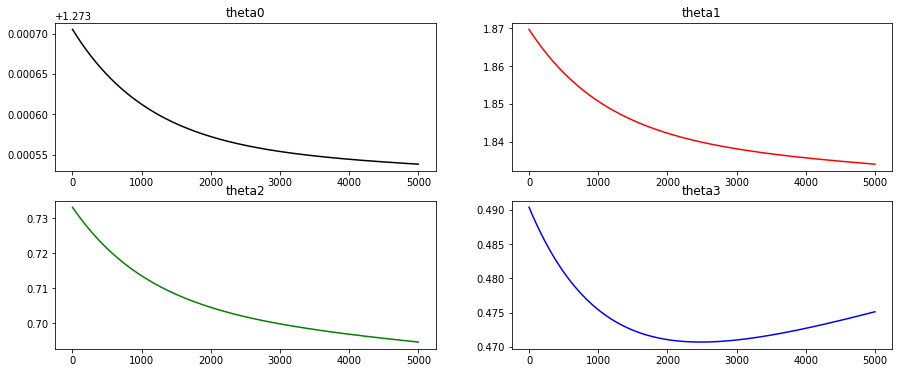

In [16]:
# 그래프가 겹치는 것을 고려하여 각각 출력

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(record_theta_241[:, 0], 'k', label='theta0')
plt.title('theta0')
plt.subplot(222)
plt.plot(record_theta_241[:, 1], 'r', label='theta1')
plt.title('theta1')
plt.subplot(223)
plt.plot(record_theta_241[:, 2], 'g', label='theta2')
plt.title('theta2')
plt.subplot(224)
plt.plot(record_theta_241[:, 3], 'b', label='theta3')
plt.title('theta3')
plt.show()

초기값때문에 학습 알고리즘이 수렴하지 않아 실패한 경우도 있었지만 결과를 첨부할 수 없어서 학습이 성공한 3개의 사례를 비교해보도록 하겠다.

3개의 경우 모두 학습을 성공적으로 마치긴 했지만 random_state에 따라서 theta0, ..., theta3의 결과가 달라진 것을 확인할 수 있다.